In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
pd.options.plotting.backend = "plotly"

In [3]:
#reading the dataset

In [4]:
df1 = pd.read_excel("/home/kala/anaconda3/envs/Intro_to_TimeSeries_Forecasting/prayagraj data/Prayagraj Data Processing Jul-2023 to Mar-2024_hourly_cal.xlsx")

In [5]:
df1.head()

,Timestamp,Totalizer1,Condensate Total,Direct Steam,Indirect Steam,Direct(%),Indirect(%),CRF,Gap,Pump1 Total,...,FJP Motive Steam Pressure,FJP Condensate Pressure,FJP Flash Steam pressure,FJP Over Flow Temperature,Flash Motive Pressure,Flash Steam Pressure,HRU INLET Temperature,HRU OUTLET Temperature,PRS Inlet Pressure,Steam Header Pressure
0,2023-07-01 00:00:58.752,9422.28,4460.0,1677.0,7745.28,17.798240,82.201760,47.334615,NaN,3330.0,...,3.346667,0.443333,0.0,43.218333,0.443333,0.0,76.878333,107.743333,12.103333,2.356667
1,2023-07-01 01:00:59.040,8049.92,2840.0,2931.0,5118.92,36.410300,63.589700,35.279854,NaN,1980.0,...,3.278333,0.398333,0.0,49.876667,0.398333,0.0,77.540000,106.131667,12.121667,3.468333
2,2023-07-01 02:00:59.328,8020.96,4150.0,2543.0,5477.96,31.704434,68.295566,51.739443,NaN,2940.0,...,3.348333,0.420000,0.0,61.096667,0.420000,0.0,80.585000,108.033333,12.300000,3.600000
3,2023-07-01 03:00:58.752,5178.94,2460.0,1966.0,3212.94,37.961436,62.038564,47.500068,NaN,1260.0,...,3.400000,0.400000,0.0,61.200000,0.400000,0.0,76.585000,111.983333,12.300000,3.600000
4,2023-07-01 04:00:59.040,6773.44,2930.0,1510.0,5263.44,22.292956,77.707044,43.257193,NaN,1770.0,...,3.400000,0.400000,0.0,61.200000,0.400000,0.0,88.063333,114.953333,12.300000,3.600000


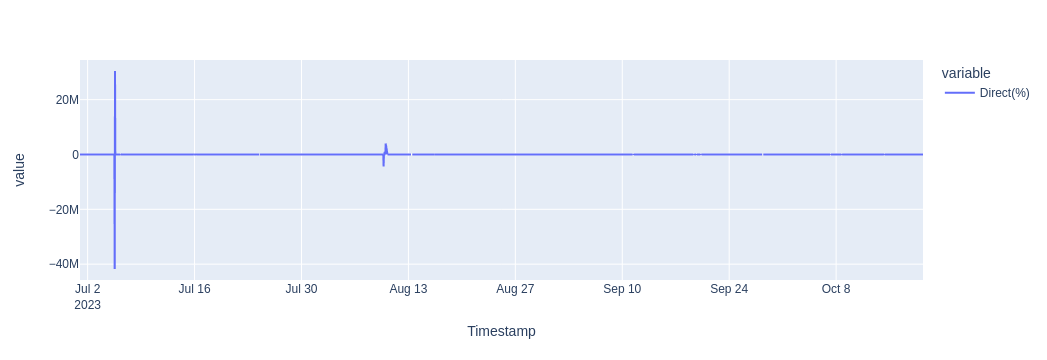

In [119]:
df1['Direct(%)'].plot() #before filteration data with outliers

In [120]:
df1.columns

Index(['Totalizer1', 'Condensate Total', 'Direct Steam', 'Indirect Steam',
       'Direct(%)', 'Indirect(%)', 'CRF', 'Gap', 'Pump1 Total', 'Pump2 Total',
       'Pump-3 Total', 'Pump4 Total ', 'Pump5 Total ', 'Feed water Temp',
       'Pump1 TEMP', 'Pump2 TEMP', 'Pump3 TEMP', 'Pump4 TEMP', 'Pump5 TEMP',
       'Steam Flow Rate',
       '( 7 Drum + 2 Soft Flow + 2 U Jet + 7 Dalmia + 2 Jigger ) Steam Total',
       '( 7 Dalmia Jets + 2 Soft Flow + 2 Jigger ) Steam Total',
       'Washing Machine 1 Steam Total', 'Washing Machine 2 Steam Total',
       'Winch Steam Total', 'Colour Kitchen Steam Total', 'Loop-1 Poly',
       'Loop-2 Cotton', 'Loop-3 (Triple Cheda)', 'PPPPU 1 Motive Pressure',
       'PPPPU 1 Condensate Pressure', 'PPPPU 1 Overflow Temperature',
       'FJP Motive Steam Pressure', 'FJP Condensate Pressure',
       'FJP Flash Steam pressure', 'FJP Over Flow Temperature',
       'Flash Motive Pressure', 'Flash Steam Pressure',
       'HRU INLET Temperature', 'HRU OUTLET Temper

# converting Timestamp format

In [8]:
df1['Timestamp'] = pd.to_datetime(df1.Timestamp ,errors='coerce')
df1 = df1.set_index('Timestamp')

# filtering 

In [9]:
df_p=df1.loc[(df1["CRF"]<=100)]
df_p.describe()

,Totalizer1,Condensate Total,Direct Steam,Indirect Steam,Direct(%),Indirect(%),CRF,Gap,Pump1 Total,Pump2 Total,...,FJP Motive Steam Pressure,FJP Condensate Pressure,FJP Flash Steam pressure,FJP Over Flow Temperature,Flash Motive Pressure,Flash Steam Pressure,HRU INLET Temperature,HRU OUTLET Temperature,PRS Inlet Pressure,Steam Header Pressure
count,2.359000e+03,2359.000000,2.352000e+03,2.359000e+03,2358.000000,2358.000000,2359.000000,931.000000,2.359000e+03,2.359000e+03,...,2160.000000,2160.000000,2113.000000,2160.000000,2160.000000,2113.000000,2160.000000,2160.000000,2157.000000,2160.000000
mean,8.056258e+03,4233.077575,4.001232e+03,4.066899e+03,36.867627,63.132373,53.483680,-11.501071,2.685172e+03,1.097486e+03,...,36.026286,235.999552,12.884824,88.625454,235.999552,12.884824,80.821967,116.304419,42.881452,39.824643
std,9.823446e+04,2277.395532,7.500576e+05,7.273275e+05,8899.553282,8899.553282,9.394320,14136.805650,3.582317e+05,3.474404e+05,...,222.934471,578.396663,137.987136,229.090553,578.396663,137.987136,7.714805,5.410848,216.323672,236.697417
min,-2.257914e+06,10.000000,-1.286391e+07,-1.286171e+07,-158018.371958,-164459.439648,-4.578857,-164503.291240,-1.229841e+07,-1.192929e+07,...,0.000000,0.000000,0.000000,14.873684,0.000000,0.000000,60.185000,75.486667,4.671053,0.000000
25%,6.477750e+03,3355.000000,2.142750e+03,4.095040e+03,29.068555,60.177281,47.933389,7.054435,2.010000e+03,8.100000e+02,...,3.126250,0.438333,0.000000,48.584167,0.438333,0.000000,75.390000,113.700417,11.628333,3.251667
50%,7.979900e+03,4220.000000,2.673500e+03,5.324130e+03,34.423532,65.576468,53.477052,13.454029,2.670000e+03,1.080000e+03,...,3.266667,0.513333,0.000000,53.313421,0.513333,0.000000,78.989167,116.746667,11.879310,3.500000
75%,9.071710e+03,4980.000000,3.151000e+03,6.303275e+03,39.822719,70.931445,59.129135,22.197851,3.270000e+03,1.350000e+03,...,3.388333,0.706667,0.000000,58.584167,0.706667,0.000000,85.907500,119.628333,12.251667,3.586667
max,2.718933e+06,54460.000000,1.287080e+07,1.287372e+07,164559.439648,158118.371958,91.795321,158058.084962,1.230225e+07,1.193049e+07,...,1600.000000,1700.000000,1600.000000,1600.000000,1700.000000,1600.000000,103.418333,170.926667,1600.000000,1600.000000


In [10]:
df_p=df_p.loc[(df1["Direct(%)"]<=100)&(df1["Direct(%)"]>=0)]
df_p.describe()

,Totalizer1,Condensate Total,Direct Steam,Indirect Steam,Direct(%),Indirect(%),CRF,Gap,Pump1 Total,Pump2 Total,...,FJP Motive Steam Pressure,FJP Condensate Pressure,FJP Flash Steam pressure,FJP Over Flow Temperature,Flash Motive Pressure,Flash Steam Pressure,HRU INLET Temperature,HRU OUTLET Temperature,PRS Inlet Pressure,Steam Header Pressure
count,2.311000e+03,2311.000000,2.305000e+03,2311.000000,2311.000000,2311.000000,2311.000000,912.000000,2.311000e+03,2.311000e+03,...,2114.000000,2114.000000,2068.000000,2114.000000,2114.000000,2068.000000,2114.000000,2114.000000,2111.000000,2114.000000
mean,8.923357e+03,4250.022501,3.590477e+03,5342.201683,33.905121,66.094879,53.638542,15.920509,-2.626564e+03,-4.061930e+03,...,36.741227,237.103675,13.165199,89.504048,237.103675,13.165199,80.890734,116.318328,43.556120,40.621981
std,4.718088e+04,2277.385443,4.709201e+04,3091.981574,12.414896,12.414896,9.001156,13.622382,2.558894e+05,2.481740e+05,...,225.294750,579.376349,139.467847,231.489861,579.376349,139.467847,7.707411,5.308527,218.620150,239.197543
min,3.106900e+02,90.000000,0.000000e+00,20.360000,0.000000,0.213173,0.152173,-43.499896,-1.229841e+07,-1.192929e+07,...,0.000000,0.000000,0.000000,14.873684,0.000000,0.000000,60.470000,75.486667,4.671053,0.000000
25%,6.520625e+03,3367.000000,2.145000e+03,4151.490000,29.022566,60.509633,48.000646,7.420822,2.040000e+03,8.100000e+02,...,3.125000,0.439237,0.000000,48.671250,0.439237,0.000000,75.420000,113.710085,11.623333,3.255203
50%,7.988900e+03,4232.000000,2.663000e+03,5335.580000,34.331556,65.668444,53.533511,13.533855,2.670000e+03,1.080000e+03,...,3.266384,0.513333,0.000000,53.437500,0.513333,0.000000,79.042500,116.718333,11.871667,3.500000
75%,9.067170e+03,4980.000000,3.140000e+03,6315.765000,39.490367,70.977434,59.144300,22.157313,3.270000e+03,1.350000e+03,...,3.390000,0.706667,0.000000,58.650417,0.706667,0.000000,86.042917,119.618333,12.268333,3.586667
max,2.267151e+06,54460.000000,2.262318e+06,69224.040000,99.786827,100.000000,91.795321,67.438393,3.849000e+04,1.407000e+04,...,1600.000000,1700.000000,1600.000000,1600.000000,1700.000000,1600.000000,103.418333,170.926667,1600.000000,1600.000000


In [11]:
df_p=df_p.loc[(df1["Totalizer1"]<=12000)]

In [12]:
df_p=df_p[['Totalizer1', 'Condensate Total', 'Direct Steam',
       'Indirect Steam', 'Direct(%)', 'Indirect(%)', 'CRF', 'Gap',
       'Feed water Temp', 'Steam Flow Rate',
      'PPPPU 1 Motive Pressure',
       'PPPPU 1 Condensate Pressure', 'PPPPU 1 Overflow Temperature',
       'FJP Motive Steam Pressure', 'FJP Condensate Pressure',
       'FJP Flash Steam pressure', 'FJP Over Flow Temperature',
       'Flash Motive Pressure', 'Flash Steam Pressure',
       'HRU INLET Temperature', 'HRU OUTLET Temperature', 'PRS Inlet Pressure',
       'Steam Header Pressure','Pump1 TEMP', 'Pump2 TEMP',
       'Pump3 TEMP', 'Pump4 TEMP', 'Pump5 TEMP']]

In [13]:
df_p.describe()

,Totalizer1,Condensate Total,Direct Steam,Indirect Steam,Direct(%),Indirect(%),CRF,Gap,Feed water Temp,Steam Flow Rate,...,Flash Steam Pressure,HRU INLET Temperature,HRU OUTLET Temperature,PRS Inlet Pressure,Steam Header Pressure,Pump1 TEMP,Pump2 TEMP,Pump3 TEMP,Pump4 TEMP,Pump5 TEMP
count,2295.000000,2295.000000,2289.000000,2295.000000,2295.000000,2295.000000,2295.000000,906.000000,2291.000000,2295.000000,...,2055.000000,2101.000000,2101.000000,2098.000000,2101.000000,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000
mean,7721.943224,4136.144662,2547.203582,5181.398998,33.917907,66.082093,53.693006,15.924772,87.931720,7405.776083,...,13.248482,80.884865,116.338233,43.752821,40.854357,79.827515,91.492577,97.228273,47.480386,75.872280
std,1787.891266,1121.942717,848.011012,1628.465829,12.341923,12.341923,8.933438,13.646990,4.060953,1754.186114,...,139.904560,7.696033,5.287116,219.282416,239.918463,6.050028,9.931522,4.352068,12.972937,9.943416
min,310.690000,90.000000,0.000000,20.360000,0.000000,0.634394,18.978804,-43.499896,67.212500,357.730467,...,0.000000,60.470000,75.486667,4.671053,0.000000,23.703382,31.467391,39.283116,27.113877,28.855882
25%,6513.290000,3360.000000,2143.000000,4143.205000,29.054838,60.476738,48.017855,7.358704,85.924052,6233.768967,...,0.000000,75.418333,113.726667,11.623534,3.258333,76.602368,89.614438,97.559214,36.540731,76.050766
50%,7968.710000,4220.000000,2659.000000,5331.450000,34.353650,65.646350,53.553072,13.533855,88.487708,7678.174833,...,0.000000,79.031667,116.750000,11.872274,3.500000,80.711990,94.705152,98.321053,44.565580,79.304625
75%,9043.720000,4970.000000,3126.000000,6286.435000,39.523262,70.945162,59.156287,22.148247,90.707813,8718.935166,...,0.000000,86.055000,119.618333,12.269583,3.586667,84.304992,97.561027,98.843045,56.196216,81.003296
max,11997.270000,6960.000000,5793.000000,10248.380000,99.365606,100.000000,91.795321,67.438393,98.513542,11316.290770,...,1600.000000,103.418333,170.926667,1600.000000,1600.000000,90.143367,103.456467,101.148741,84.794430,91.604362


# Feature Engineering

In [14]:
df_p["Condeset_temp"]=df_p['Pump1 TEMP']+df_p['Pump2 TEMP']+df_p['Pump3 TEMP']+df_p['Pump5 TEMP']
df_p["Condeset_temp"]=df_p["Condeset_temp"]/4

In [15]:
df_p["Condeset_temp"]=pd.to_numeric(df_p["Condeset_temp"], downcast='float',errors='coerce')

In [16]:
df_p["Totalizer2"]=df_p["Totalizer1"]/100

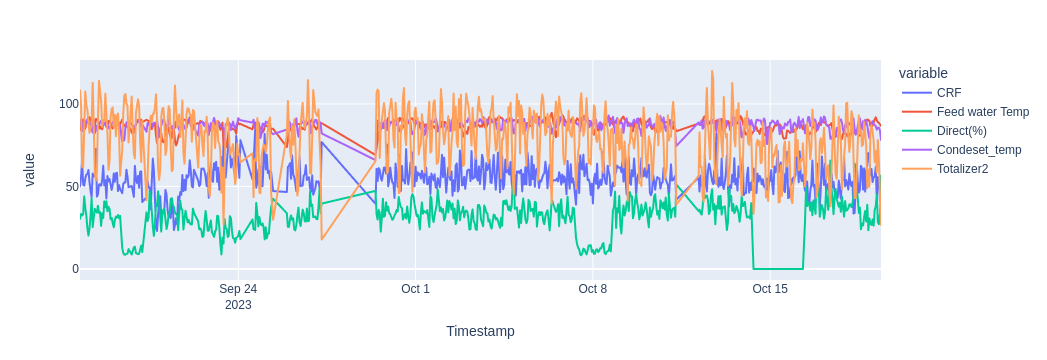

In [17]:
df_p[[ 'CRF','Feed water Temp','Direct(%)',"Condeset_temp",'Totalizer2']][-650:].plot()

In [18]:
df_com=df_p.copy()

# creating a funtion to identify the diff of each current instance value to prev value

In [19]:
def diff_fun():
    df_com['Direct%_Diff'] = df_com['Direct(%)'].diff()
    mask = df_com['Direct%_Diff'] > 0
    for col in ['CRF', 'Feed water Temp','Condeset_temp', 'Totalizer1']:
        df_com[f'{col}_Diff'] = df_com[col] - df_com[col].shift()
        df_com[f'{col}_Diff(%)'] = (df_com[col] - df_com[col].shift()) / df_com[col].shift()*100
    return df_com

In [20]:
#diff
diff_fun()[['Direct%_Diff','CRF_Diff','Feed water Temp_Diff','Condeset_temp_Diff','Totalizer1_Diff']].head()

,Direct%_Diff,CRF_Diff,Feed water Temp_Diff,Condeset_temp_Diff,Totalizer1_Diff
Timestamp,,,,,
2023-07-01 00:00:58.752,NaN,NaN,NaN,NaN,NaN
2023-07-01 01:00:59.040,18.612060,-12.054762,0.602917,1.436081,-1372.36
2023-07-01 02:00:59.328,-4.705865,16.459589,1.280417,-4.090714,-28.96
2023-07-01 03:00:58.752,6.257002,-4.239375,3.225208,3.050156,-2842.02
2023-07-01 04:00:59.040,-15.668480,-4.242875,2.359167,-3.506081,1594.50


In [21]:
#diff(%)
diff_fun()[['Direct%_Diff','CRF_Diff(%)','Feed water Temp_Diff(%)','Condeset_temp_Diff(%)','Totalizer1_Diff(%)']].head()

,Direct%_Diff,CRF_Diff(%),Feed water Temp_Diff(%),Condeset_temp_Diff(%),Totalizer1_Diff(%)
Timestamp,,,,,
2023-07-01 00:00:58.752,NaN,NaN,NaN,NaN,NaN
2023-07-01 01:00:59.040,18.612060,-25.467117,0.723627,1.634386,-14.565052
2023-07-01 02:00:59.328,-4.705865,46.654357,1.525728,-4.580723,-0.359755
2023-07-01 03:00:58.752,6.257002,-8.193701,3.785363,3.579487,-35.432417
2023-07-01 04:00:59.040,-15.668480,-8.932355,2.667917,-3.972345,30.788154


# new columns added :  
'Direct%_Diff', 'CRF_Diff', 'CRF_Diff(%)', 'Feed water Temp_Diff',
'Feed water Temp_Diff(%)', 'Condeset_temp_Diff',
'Condeset_temp_Diff(%)', 'Totalizer1_Diff', 'Totalizer1_Diff(%)'

In [22]:
diff_fun().columns

Index(['Totalizer1', 'Condensate Total', 'Direct Steam', 'Indirect Steam',
       'Direct(%)', 'Indirect(%)', 'CRF', 'Gap', 'Feed water Temp',
       'Steam Flow Rate', 'PPPPU 1 Motive Pressure',
       'PPPPU 1 Condensate Pressure', 'PPPPU 1 Overflow Temperature',
       'FJP Motive Steam Pressure', 'FJP Condensate Pressure',
       'FJP Flash Steam pressure', 'FJP Over Flow Temperature',
       'Flash Motive Pressure', 'Flash Steam Pressure',
       'HRU INLET Temperature', 'HRU OUTLET Temperature', 'PRS Inlet Pressure',
       'Steam Header Pressure', 'Pump1 TEMP', 'Pump2 TEMP', 'Pump3 TEMP',
       'Pump4 TEMP', 'Pump5 TEMP', 'Condeset_temp', 'Totalizer2',
       'Direct%_Diff', 'CRF_Diff', 'CRF_Diff(%)', 'Feed water Temp_Diff',
       'Feed water Temp_Diff(%)', 'Condeset_temp_Diff',
       'Condeset_temp_Diff(%)', 'Totalizer1_Diff', 'Totalizer1_Diff(%)'],
      dtype='object')

In [23]:
dff=diff_fun().copy()

In [121]:
dff[['Direct(%)','Direct%_Diff']].head()

,Direct(%),Direct%_Diff
Timestamp,,
2023-07-01 00:00:58.752,17.798240,NaN
2023-07-01 01:00:59.040,36.410300,18.612060
2023-07-01 02:00:59.328,31.704434,-4.705865
2023-07-01 03:00:58.752,37.961436,6.257002
2023-07-01 04:00:59.040,22.292956,-15.668480


In [122]:
df_indNUM=dff.reset_index()

In [123]:
df_indNUM.head()

,Timestamp,Totalizer1,Condensate Total,Direct Steam,Indirect Steam,Direct(%),Indirect(%),CRF,Gap,Feed water Temp,...,Totalizer2,Direct%_Diff,CRF_Diff,CRF_Diff(%),Feed water Temp_Diff,Feed water Temp_Diff(%),Condeset_temp_Diff,Condeset_temp_Diff(%),Totalizer1_Diff,Totalizer1_Diff(%)
0,2023-07-01 00:00:58.752,9422.28,4460.0,1677.0,7745.28,17.798240,82.201760,47.334615,NaN,83.318750,...,94.2228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-07-01 01:00:59.040,8049.92,2840.0,2931.0,5118.92,36.410300,63.589700,35.279854,NaN,83.921667,...,80.4992,18.612060,-12.054762,-25.467117,0.602917,0.723627,1.436081,1.634386,-1372.36,-14.565052
2,2023-07-01 02:00:59.328,8020.96,4150.0,2543.0,5477.96,31.704434,68.295566,51.739443,NaN,85.202083,...,80.2096,-4.705865,16.459589,46.654357,1.280417,1.525728,-4.090714,-4.580723,-28.96,-0.359755
3,2023-07-01 03:00:58.752,5178.94,2460.0,1966.0,3212.94,37.961436,62.038564,47.500068,NaN,88.427292,...,51.7894,6.257002,-4.239375,-8.193701,3.225208,3.785363,3.050156,3.579487,-2842.02,-35.432417
4,2023-07-01 04:00:59.040,6773.44,2930.0,1510.0,5263.44,22.292956,77.707044,43.257193,NaN,90.786458,...,67.7344,-15.668480,-4.242875,-8.932355,2.359167,2.667917,-3.506081,-3.972345,1594.50,30.788154


# finding increasing_subsequences

In [124]:
#finding the indices of Increasing Direct% 
def increasing_subsequences_indices(arr):
    re=[]
    current_sequence = []
    for i in range(len(arr) - 1):
        if arr[i] < arr[i + 1]:
            current_sequence.append(i)
        else:
            current_sequence.append(i)
            if len(current_sequence) > 1:
                re.append([current_sequence[0], current_sequence[-1]])
            current_sequence = []

    if current_sequence and arr[-1] > arr[current_sequence[-1]]:
        current_sequence.append(len(arr) - 1)
        if len(current_sequence) > 1:
            re.append([current_sequence[0], current_sequence[-1]])
    return re

In [125]:

def replace_indices_with_timestamps(df, indices_list):
    result=[]
    for indices_pair in indices_list:
        start_index,end_index = indices_pair
        start_timestamp = df.index[start_index]
        end_timestamp = df.index[end_index]
        result.append([start_timestamp, end_timestamp])
    return result

In [126]:
time=replace_indices_with_timestamps(dff,increasing_subsequences_indices(dff["Direct(%)"]))

In [127]:
def increasing_subsequences_value(arr):
    re=[]
    diff=[]
    current_sequence=[]
    for i in range(len(arr)-1):
        if arr[i]<arr[i+1]:
            current_sequence.append(arr[i])
        else:
            current_sequence.append(arr[i])
            if len(current_sequence)>1:
                re.append(current_sequence)
            current_sequence=[]
    #print(arr[-1],arr)
    #print(current_sequence[-1],current_sequence)
    if current_sequence and arr[-1]>current_sequence[-1]:
        current_sequence.append(arr[-1])
        if len(current_sequence)>1:
            re.append(current_sequence)       
    return re

In [128]:
indices_data=increasing_subsequences_indices(dff['Direct(%)'])

In [129]:
value=increasing_subsequences_value(dff['Direct(%)'])
values=[]
for i in range(len(value)):
    diff=increasing_subsequences_value(dff['Direct(%)'])[i][-1]-increasing_subsequences_value(dff['Direct(%)'])[i][0]
    values.append([value[i][0],value[i][-1],len(increasing_subsequences_value(dff['Direct(%)'])[i]),diff])

In [130]:
df11 = pd.DataFrame(time, columns=['Start_Index', 'End_Index'])

In [131]:
df12 = pd.DataFrame(values, columns=['Start_Val', 'End_Val',"Count",'Diff'])

In [132]:
result = pd.concat([df11, df12], axis=1)

In [133]:
result['Percentage Difference'] = abs((result['Start_Val'] - result['End_Val']) / 100) * 100
r1=result[result['Percentage Difference']>15]
r1=r1.reset_index()
r1.head()

,index,Start_Index,End_Index,Start_Val,End_Val,Count,Diff,Percentage Difference
0,0,2023-07-01 00:00:58.752,2023-07-01 01:00:59.040,17.798240,36.410300,2,18.612060,18.612060
1,2,2023-07-01 04:00:59.040,2023-07-01 08:00:59.328,22.292956,67.708363,5,45.415407,45.415407
2,5,2023-07-01 16:00:59.040,2023-07-01 19:00:59.040,21.617873,36.647264,4,15.029391,15.029391
3,10,2023-07-02 07:00:59.040,2023-07-02 09:00:58.752,22.275227,49.943458,3,27.668231,27.668231
4,11,2023-07-02 11:00:59.328,2023-07-02 14:00:59.328,22.984631,41.598269,4,18.613638,18.613638


In [134]:
sel_col = ['CRF_Diff(%)', 'Feed water Temp_Diff(%)', 'Condeset_temp_Diff(%)', 'Totalizer1_Diff(%)']

In [135]:
def get_values_between_timestamps_plot(df, start_timestamp, end_timestamp, col_name):
    mask = (df.index >= start_timestamp) & (df.index <= end_timestamp)
    values_between_timestamps = df.loc[mask, col_name]
    return values_between_timestamps.plot()

In [136]:
def get_values_between_timestamps(df, start_timestamp, end_timestamp, col_name):
    mask = (df.index >= start_timestamp) & (df.index <= end_timestamp)
    values_between_timestamps = df.loc[mask, col_name]
    return values_between_timestamps 

In [137]:
def get_start_end_timestamps(df, start_timestamp, end_timestamp,sel_col):
    start_end_timestamps = df[(df.index == start_timestamp) | (df.index == end_timestamp)]
    return start_end_timestamps[sel_col]

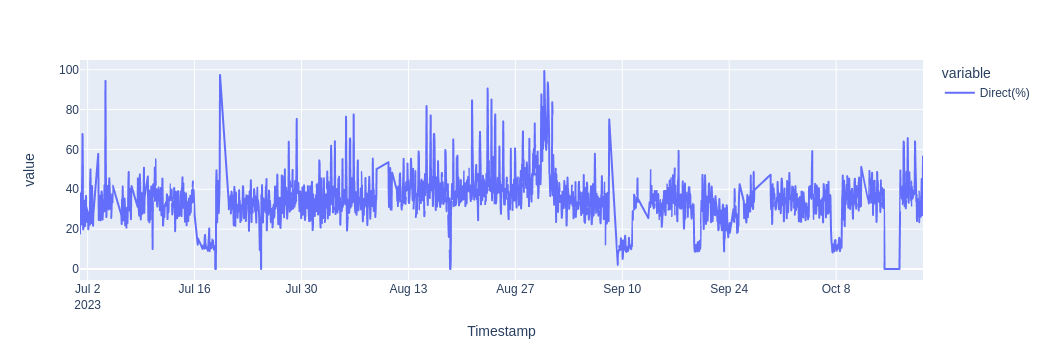

In [138]:
dff['Direct(%)'].plot()  

In [139]:
get_values_between_timestamps(dff,r1['Start_Index'][22],r1['End_Index'][22],['Direct(%)','CRF','Feed water Temp','Condeset_temp','Totalizer1'])

,Direct(%),CRF,Feed water Temp,Condeset_temp,Totalizer1
Timestamp,,,,,
2023-07-19 04:00:59.040,28.047234,64.621650,87.583750,86.205757,9733.58
2023-07-19 05:00:59.328,33.589925,48.182740,90.110833,87.369415,8696.06
2023-07-19 06:00:58.752,38.228232,46.632124,89.337292,86.966118,7913.00
2023-07-19 07:00:59.040,48.591015,34.624967,88.935208,84.947319,5169.68
2023-07-19 08:00:59.328,97.347148,55.030551,91.028542,76.890015,1580.94


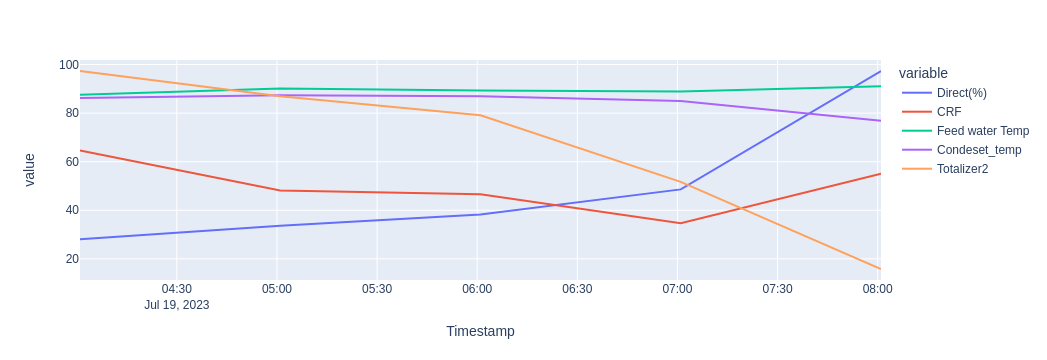

In [140]:
get_values_between_timestamps_plot(dff,r1['Start_Index'][22],r1['End_Index'][22],['Direct(%)','CRF','Feed water Temp','Condeset_temp','Totalizer2'])

In [141]:
get_start_end_timestamps(dff,r1['Start_Index'][0],r1['End_Index'][0],['Direct(%)','CRF','Feed water Temp','Condeset_temp','Totalizer1'])

,Direct(%),CRF,Feed water Temp,Condeset_temp,Totalizer1
Timestamp,,,,,
2023-07-01 00:00:58.752,17.79824,47.334615,83.318750,87.866714,9422.28
2023-07-01 01:00:59.040,36.41030,35.279854,83.921667,89.302795,8049.92


In [142]:
diff_df = get_start_end_timestamps(dff,r1['Start_Index'][1],r1['End_Index'][1],['Direct(%)','CRF','Feed water Temp','Condeset_temp','Totalizer1']).diff()
diff_df

,Direct(%),CRF,Feed water Temp,Condeset_temp,Totalizer1
Timestamp,,,,,
2023-07-01 04:00:59.040,NaN,NaN,NaN,NaN,NaN
2023-07-01 08:00:59.328,45.415407,1.675773,-4.615417,-3.108871,-3212.58


In [143]:
def conv_per(diff_df):
    diff_df = get_start_end_timestamps(dff,r1['Start_Index'][1],r1['End_Index'][1],['Direct(%)','CRF','Feed water Temp','Condeset_temp','Totalizer1']).diff()
    diff_df['Direct(%)']=(diff_df['Direct(%)']/100)*100
    diff_df['Totalizer1']=(diff_df['Totalizer1']/12000)*100
    diff_df['Feed water Temp']=(diff_df['Feed water Temp']/100)*100
    diff_df['Condeset_temp']=(diff_df['Condeset_temp']/100)*100
    return diff_df

In [144]:

diff= get_start_end_timestamps(dff,r1['Start_Index'][1],r1['End_Index'][1],['Direct(%)','CRF','Feed water Temp','Condeset_temp','Totalizer1'])
print(diff)
diff=conv_per(diff)
diff

                         Direct(%)        CRF  Feed water Temp  Condeset_temp  \
Timestamp                                                                       
2023-07-01 04:00:59.040  22.292956  43.257193        90.786458      84.756157   
2023-07-01 08:00:59.328  67.708363  44.932966        86.171042      81.647285   

                         Totalizer1  
Timestamp                            
2023-07-01 04:00:59.040     6773.44  
2023-07-01 08:00:59.328     3560.86  


,Direct(%),CRF,Feed water Temp,Condeset_temp,Totalizer1
Timestamp,,,,,
2023-07-01 04:00:59.040,NaN,NaN,NaN,NaN,NaN
2023-07-01 08:00:59.328,45.415407,1.675773,-4.615417,-3.108871,-26.7715


In [183]:
def label_movement(percentage, increase_threshold, decrease_threshold):
    if percentage < decrease_threshold:
        return 'Decrease'
    elif percentage > increase_threshold:
        return 'Increase'
    else:
        return 'Flat'
    
thresholds = {
    'Direct%': {'increase':5,'decrease':-5},
    'Totalizer1%': {'increase':6,'decrease':-6},
    'CRF%': {'increase':3, 'decrease': -3},
    'Feed water Temp%': {'increase':1,'decrease': -1},
    'Condeset_temp%':{'increase':5,'decrease': -5}
}

In [184]:
result1 = pd.DataFrame(columns=['Start_Index', 'End_Index','Direct%_start','Direct%_end','Direct%','CRF_start','CRF_end','CRF%','Feed water Temp_start','Feed water Temp_end','Feed water Temp%','Condeset_temp_start','Condeset_temp_end','Condeset_temp%','Totalizer1_start','Totalizer1_end','Totalizer1%','Direct%_label','crf_label','fwt_label','cond_tem_label','tot_label'])
for i in range(len(r1)):
     
    val=get_start_end_timestamps(dff,r1['Start_Index'][i],r1['End_Index'][i],['Direct(%)','CRF','Feed water Temp','Condeset_temp','Totalizer1'])
    direct_strat=val['Direct(%)'][0]
    direct_end=val['Direct(%)'][1]
    crf_end=val['CRF'][1]
    crf_start=val['CRF'][0]
    Feed_water_Temp_end=val['Feed water Temp'][1]
    Feed_water_Temp_start=val['Feed water Temp'][0]
    Condeset_temp_start=val['Condeset_temp'][0]
    Condeset_temp_end=val['Condeset_temp'][1]
    Totalizer1_start=val['Totalizer1'][0]
    Totalizer1_end=val['Totalizer1'][1]
    
    
    diff=get_start_end_timestamps(dff,r1['Start_Index'][i],r1['End_Index'][i],['Direct(%)','CRF','Feed water Temp','Condeset_temp','Totalizer1']).diff()
    diff['Direct(%)']=(diff['Direct(%)']/100)*100
    diff['Totalizer1']=(diff['Totalizer1']/12000)*100
    diff['Feed water Temp']=(diff['Feed water Temp']/100)*100
    diff['Condeset_temp']=(diff['Condeset_temp']/100)*100
    diff['CRF']=(diff['CRF']/100)*100
    
    
    start_index = diff.index[0]
    end_index = diff.index[1]
    direct=diff['Direct(%)'][1]
    fwt=diff['Feed water Temp'][1]
    cond_tem=diff['Condeset_temp'][1]
    CRF=diff['CRF'][1]
    tot=diff['Totalizer1'][1]
    
    direct_label=label_movement(direct, thresholds['Direct%']['increase'], thresholds['Direct%']['decrease'])
    crf_label=label_movement(CRF, thresholds['CRF%']['increase'], thresholds['CRF%']['decrease'])
    fwt_label=label_movement(fwt, thresholds['Feed water Temp%']['increase'], thresholds['Feed water Temp%']['decrease'])
    cond_tem_label=label_movement(cond_tem, thresholds['Condeset_temp%']['increase'], thresholds['Condeset_temp%']['decrease'])
    tot_label=label_movement(tot, thresholds['Totalizer1%']['increase'], thresholds['Totalizer1%']['decrease'])
    result1.loc[len(result1)]=[start_index, end_index,direct_strat,direct_end,direct,crf_start,crf_end,CRF,Feed_water_Temp_start,Feed_water_Temp_end,fwt,Condeset_temp_start,Condeset_temp_end,cond_tem,Totalizer1_start,Totalizer1_end,tot,direct_label,crf_label,fwt_label,cond_tem_label,tot_label]
    #result1.loc[len(result1)]=[diff_df['Direct(%)'],diff_df['CRF'],diff_df['Feed water Temp'],diff_df['Totalizer1']]
result1.head(20)

,Start_Index,End_Index,Direct%_start,Direct%_end,Direct%,CRF_start,CRF_end,CRF%,Feed water Temp_start,Feed water Temp_end,...,Condeset_temp_end,Condeset_temp%,Totalizer1_start,Totalizer1_end,Totalizer1%,Direct%_label,crf_label,fwt_label,cond_tem_label,tot_label
0,2023-07-01 00:00:58.752,2023-07-01 01:00:59.040,17.798240,36.410300,18.612060,47.334615,35.279854,-12.054762,83.318750,83.921667,...,89.302795,1.436081,9422.28,8049.92,-11.436333,Increase,Decrease,Flat,Flat,Decrease
1,2023-07-01 04:00:59.040,2023-07-01 08:00:59.328,22.292956,67.708363,45.415407,43.257193,44.932966,1.675773,90.786458,86.171042,...,81.647285,-3.108871,6773.44,3560.86,-26.771500,Increase,Flat,Decrease,Flat,Decrease
2,2023-07-01 16:00:59.040,2023-07-01 19:00:59.040,21.617873,36.647264,15.029391,50.786015,42.085867,-8.700148,91.945000,87.534583,...,86.573029,-1.675804,8132.16,8292.57,1.336750,Increase,Decrease,Decrease,Flat,Flat
3,2023-07-02 07:00:59.040,2023-07-02 09:00:58.752,22.275227,49.943458,27.668231,47.448506,54.093755,6.645248,94.248542,96.902500,...,74.034363,-5.333832,7039.21,4288.85,-22.919667,Increase,Increase,Increase,Decrease,Decrease
4,2023-07-02 11:00:59.328,2023-07-02 14:00:59.328,22.984631,41.598269,18.613638,54.809505,39.040015,-15.769489,91.742292,94.422917,...,88.469597,3.061813,8483.93,7505.12,-8.156750,Increase,Decrease,Increase,Flat,Decrease
5,2023-07-02 17:00:59.328,2023-07-03 09:16:58.656,21.732751,57.807071,36.074321,53.159247,46.544874,-6.614373,93.836458,90.501136,...,80.419319,-9.170006,8314.64,2406.28,-49.236333,Increase,Decrease,Decrease,Decrease,Decrease
6,2023-07-04 06:00:58.752,2023-07-04 08:00:59.328,29.186785,94.349789,65.163003,39.988717,52.083957,12.095240,87.880208,91.405417,...,86.526604,-0.288071,6026.70,1670.38,-36.302667,Increase,Increase,Increase,Flat,Decrease
7,2023-07-04 11:00:59.328,2023-07-04 13:00:59.040,26.070265,41.664443,15.594178,50.674630,42.185407,-8.489222,93.005000,93.263542,...,86.709946,-0.639412,7913.23,7870.02,-0.360083,Increase,Decrease,Flat,Flat,Flat
8,2023-07-04 18:00:58.752,2023-07-04 20:00:59.328,29.850929,45.543768,15.692840,44.758050,25.363358,-19.394692,91.334167,87.188958,...,82.874290,-6.269264,8177.30,6347.74,-15.246333,Increase,Decrease,Decrease,Decrease,Decrease
9,2023-07-07 05:00:59.328,2023-07-07 09:00:58.752,22.975558,48.682398,25.706840,46.564541,59.721901,13.157360,89.875625,92.998333,...,78.247055,-6.677444,10759.26,4973.05,-48.218417,Increase,Increase,Increase,Decrease,Decrease


In [185]:
columns=['Direct%_start','Direct%_end','Direct%','CRF_start','CRF_end','CRF%','Feed water Temp_start','Feed water Temp_end','Feed water Temp%','Condeset_temp_start','Condeset_temp_end','Condeset_temp%','Totalizer1_start','Totalizer1_end','Totalizer1%']

In [186]:
result1['Condeset_temp%'].mean()
print(max(result1['Condeset_temp%']))
print(min(result1['Condeset_temp%']))
result1[result1['Condeset_temp%']<0]

9.913963317871094
-55.40803146362305


,Start_Index,End_Index,Direct%_start,Direct%_end,Direct%,CRF_start,CRF_end,CRF%,Feed water Temp_start,Feed water Temp_end,...,Condeset_temp_end,Condeset_temp%,Totalizer1_start,Totalizer1_end,Totalizer1%,Direct%_label,crf_label,fwt_label,cond_tem_label,tot_label
1,2023-07-01 04:00:59.040,2023-07-01 08:00:59.328,22.292956,67.708363,45.415407,43.257193,44.932966,1.675773,90.786458,86.171042,...,81.647285,-3.108871,6773.44,3560.86,-26.771500,Increase,Flat,Decrease,Flat,Decrease
2,2023-07-01 16:00:59.040,2023-07-01 19:00:59.040,21.617873,36.647264,15.029391,50.786015,42.085867,-8.700148,91.945000,87.534583,...,86.573029,-1.675804,8132.16,8292.57,1.336750,Increase,Decrease,Decrease,Flat,Flat
3,2023-07-02 07:00:59.040,2023-07-02 09:00:58.752,22.275227,49.943458,27.668231,47.448506,54.093755,6.645248,94.248542,96.902500,...,74.034363,-5.333832,7039.21,4288.85,-22.919667,Increase,Increase,Increase,Decrease,Decrease
5,2023-07-02 17:00:59.328,2023-07-03 09:16:58.656,21.732751,57.807071,36.074321,53.159247,46.544874,-6.614373,93.836458,90.501136,...,80.419319,-9.170006,8314.64,2406.28,-49.236333,Increase,Decrease,Decrease,Decrease,Decrease
6,2023-07-04 06:00:58.752,2023-07-04 08:00:59.328,29.186785,94.349789,65.163003,39.988717,52.083957,12.095240,87.880208,91.405417,...,86.526604,-0.288071,6026.70,1670.38,-36.302667,Increase,Increase,Increase,Flat,Decrease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2023-10-17 07:00:59.040,2023-10-17 09:00:58.752,35.843833,65.679110,29.835277,51.714350,63.414313,11.699963,86.524583,87.295127,...,78.981308,-7.715912,6288.39,3797.25,-20.759500,Increase,Increase,Flat,Decrease,Decrease
152,2023-10-17 12:00:58.752,2023-10-17 14:00:59.328,33.252129,48.554326,15.302197,52.880472,48.379039,-4.501433,82.630833,80.884375,...,79.986969,-2.848671,9909.14,5704.95,-35.034917,Increase,Decrease,Decrease,Flat,Decrease
153,2023-10-18 05:00:59.328,2023-10-18 08:00:59.328,37.493646,63.985417,26.491771,50.117030,33.939077,-16.177953,81.461875,82.344583,...,84.844612,-2.881096,9561.62,4290.04,-43.929833,Increase,Decrease,Flat,Flat,Decrease
154,2023-10-19 02:00:59.328,2023-10-19 05:00:59.328,26.213213,45.220920,19.007708,55.537557,41.542336,-13.995221,88.522708,90.155417,...,84.474648,-3.478371,7778.52,5844.64,-16.115667,Increase,Decrease,Increase,Flat,Decrease


In [187]:
direct_df=result1[['Start_Index','End_Index','Direct%_start','Direct%_end','Direct%']]
crf_df=result1[['Start_Index','End_Index','Direct%_start','Direct%_end','CRF_start','CRF_end','CRF%']]
fwt_df=result1[['Start_Index','End_Index','Direct%_start','Direct%_end','Feed water Temp_start','Feed water Temp_end','Feed water Temp%']]
cond_df=result1[['Start_Index','End_Index','Direct%_start','Direct%_end','Condeset_temp_start','Condeset_temp_end','Condeset_temp%']]
tot_df=result1[['Start_Index','End_Index','Direct%_start','Direct%_end','Totalizer1_start','Totalizer1_end','Totalizer1%']]

In [188]:
cond_df.head(20)

,Start_Index,End_Index,Direct%_start,Direct%_end,Condeset_temp_start,Condeset_temp_end,Condeset_temp%
0,2023-07-01 00:00:58.752,2023-07-01 01:00:59.040,17.798240,36.410300,87.866714,89.302795,1.436081
1,2023-07-01 04:00:59.040,2023-07-01 08:00:59.328,22.292956,67.708363,84.756157,81.647285,-3.108871
2,2023-07-01 16:00:59.040,2023-07-01 19:00:59.040,21.617873,36.647264,88.248833,86.573029,-1.675804
3,2023-07-02 07:00:59.040,2023-07-02 09:00:58.752,22.275227,49.943458,79.368195,74.034363,-5.333832
4,2023-07-02 11:00:59.328,2023-07-02 14:00:59.328,22.984631,41.598269,85.407784,88.469597,3.061813
5,2023-07-02 17:00:59.328,2023-07-03 09:16:58.656,21.732751,57.807071,89.589325,80.419319,-9.170006
6,2023-07-04 06:00:58.752,2023-07-04 08:00:59.328,29.186785,94.349789,86.814674,86.526604,-0.288071
7,2023-07-04 11:00:59.328,2023-07-04 13:00:59.040,26.070265,41.664443,87.349358,86.709946,-0.639412
8,2023-07-04 18:00:58.752,2023-07-04 20:00:59.328,29.850929,45.543768,89.143555,82.874290,-6.269264
9,2023-07-07 05:00:59.328,2023-07-07 09:00:58.752,22.975558,48.682398,84.924500,78.247055,-6.677444


In [189]:
#crf_df=result1[['Start_Index','End_Index','CRF_start','CRF_end','CRF%']]
print(crf_df[crf_df['CRF%']>0].shape)
crf_df[(crf_df['CRF%']>0)]

(70, 7)


,Start_Index,End_Index,Direct%_start,Direct%_end,CRF_start,CRF_end,CRF%
1,2023-07-01 04:00:59.040,2023-07-01 08:00:59.328,22.292956,67.708363,43.257193,44.932966,1.675773
3,2023-07-02 07:00:59.040,2023-07-02 09:00:58.752,22.275227,49.943458,47.448506,54.093755,6.645248
6,2023-07-04 06:00:58.752,2023-07-04 08:00:59.328,29.186785,94.349789,39.988717,52.083957,12.095240
9,2023-07-07 05:00:59.328,2023-07-07 09:00:58.752,22.975558,48.682398,46.564541,59.721901,13.157360
13,2023-07-09 10:00:59.040,2023-07-09 21:13:58.944,28.224113,46.450539,46.276309,56.329417,10.053107
...,...,...,...,...,...,...,...
135,2023-10-03 10:00:59.040,2023-10-03 12:00:58.752,23.649870,38.882290,55.503555,62.169515,6.665960
140,2023-10-06 22:00:59.040,2023-10-07 00:00:58.752,27.717236,43.779834,53.314027,65.455377,12.141350
141,2023-10-08 17:00:59.328,2023-10-08 21:00:58.752,10.700553,46.879050,44.419186,56.674378,12.255192
149,2023-10-16 19:00:59.040,2023-10-16 20:00:59.328,33.443126,63.969317,39.857054,47.919503,8.062449


In [190]:
print(crf_df[(crf_df['CRF%']>0) & (crf_df['CRF_start']>50) & (crf_df['CRF_end']>50)].shape)
crf_df[(crf_df['CRF%']>0) & (crf_df['CRF_start']>50) & (crf_df['CRF_end']>50)]

(39, 7)


,Start_Index,End_Index,Direct%_start,Direct%_end,CRF_start,CRF_end,CRF%
21,2023-07-18 23:00:59.328,2023-07-19 01:00:59.040,23.434255,44.281866,55.853099,65.967848,10.114749
26,2023-07-24 17:00:59.328,2023-07-24 18:00:58.752,0.000000,37.095788,52.564391,53.916420,1.352028
29,2023-07-27 06:00:58.752,2023-07-27 08:00:59.328,20.623683,35.823556,59.143860,61.025012,1.881152
32,2023-07-27 17:00:59.328,2023-07-27 20:00:59.328,25.924548,50.005087,55.825433,75.981756,20.156323
33,2023-07-28 06:00:58.752,2023-07-28 08:00:59.328,34.964823,63.860386,50.642052,62.696938,12.054886
37,2023-07-31 04:00:59.040,2023-07-31 09:00:58.752,24.265267,43.719859,55.883644,62.348585,6.464940
38,2023-07-31 11:00:59.328,2023-07-31 13:00:59.040,19.519900,37.374344,64.447348,70.734052,6.286704
44,2023-08-02 16:00:59.040,2023-08-02 21:00:58.752,27.100525,61.855412,63.160480,64.834285,1.673804
45,2023-08-03 06:00:58.752,2023-08-03 09:00:58.752,36.281550,64.133239,50.589329,76.219888,25.630559
48,2023-08-04 17:00:59.328,2023-08-04 20:00:59.328,32.494376,76.435934,50.467533,56.619210,6.151677


In [191]:
crf_df[crf_df['CRF%']<0]

,Start_Index,End_Index,Direct%_start,Direct%_end,CRF_start,CRF_end,CRF%
0,2023-07-01 00:00:58.752,2023-07-01 01:00:59.040,17.798240,36.410300,47.334615,35.279854,-12.054762
2,2023-07-01 16:00:59.040,2023-07-01 19:00:59.040,21.617873,36.647264,50.786015,42.085867,-8.700148
4,2023-07-02 11:00:59.328,2023-07-02 14:00:59.328,22.984631,41.598269,54.809505,39.040015,-15.769489
5,2023-07-02 17:00:59.328,2023-07-03 09:16:58.656,21.732751,57.807071,53.159247,46.544874,-6.614373
7,2023-07-04 11:00:59.328,2023-07-04 13:00:59.040,26.070265,41.664443,50.674630,42.185407,-8.489222
...,...,...,...,...,...,...,...
150,2023-10-17 03:00:58.752,2023-10-17 05:00:59.328,30.459952,48.798256,50.906956,45.613374,-5.293582
152,2023-10-17 12:00:58.752,2023-10-17 14:00:59.328,33.252129,48.554326,52.880472,48.379039,-4.501433
153,2023-10-18 05:00:59.328,2023-10-18 08:00:59.328,37.493646,63.985417,50.117030,33.939077,-16.177953
154,2023-10-19 02:00:59.328,2023-10-19 05:00:59.328,26.213213,45.220920,55.537557,41.542336,-13.995221


In [192]:
result1[['tot_label','crf_label','fwt_label','cond_tem_label']].value_counts()

tot_label  crf_label  fwt_label  cond_tem_label
Decrease   Decrease   Increase   Flat              15
           Increase   Increase   Decrease          14
                                 Flat              12
           Decrease   Flat       Flat              11
                      Increase   Decrease          11
Flat       Decrease   Decrease   Flat              11
Decrease   Flat       Increase   Flat              10
           Decrease   Decrease   Flat               9
                                 Decrease           7
Increase   Decrease   Decrease   Flat               6
Decrease   Increase   Flat       Flat               5
                      Decrease   Flat               5
Increase   Increase   Decrease   Flat               4
Flat       Decrease   Flat       Flat               4
Decrease   Increase   Decrease   Decrease           3
                      Flat       Decrease           3
           Flat       Increase   Decrease           3
                      Decrease   F

# Pattern Observation

In [193]:
a=result1[['tot_label','crf_label','fwt_label','cond_tem_label']].value_counts()
a_df=a.reset_index()
a_df.columns=['tot_label','crf_label','fwt_label','cond_tem_label', 'count']
a_df.fillna(method='ffill', inplace=True)
a_df

,tot_label,crf_label,fwt_label,cond_tem_label,count
0,Decrease,Decrease,Increase,Flat,15
1,Decrease,Increase,Increase,Decrease,14
2,Decrease,Increase,Increase,Flat,12
3,Decrease,Decrease,Flat,Flat,11
4,Decrease,Decrease,Increase,Decrease,11
5,Flat,Decrease,Decrease,Flat,11
6,Decrease,Flat,Increase,Flat,10
7,Decrease,Decrease,Decrease,Flat,9
8,Decrease,Decrease,Decrease,Decrease,7
9,Increase,Decrease,Decrease,Flat,6


In [194]:
def find_freq(result_df, tot_label, crf_label, fwt_label, cond_tem_label):
    query=f"(result_df['tot_label']=='{tot_label}') & "
    query+=f"(result_df['crf_label']=='{crf_label}') & "
    query+=f"(result_df['fwt_label']=='{fwt_label}') & "
    query+=f"(result_df['cond_tem_label']=='{cond_tem_label}')"
    return result_df[eval(query)]
cases=find_freq(result1, 'Increase','Decrease','Decrease','Flat')
cases

,Start_Index,End_Index,Direct%_start,Direct%_end,Direct%,CRF_start,CRF_end,CRF%,Feed water Temp_start,Feed water Temp_end,...,Condeset_temp_end,Condeset_temp%,Totalizer1_start,Totalizer1_end,Totalizer1%,Direct%_label,crf_label,fwt_label,cond_tem_label,tot_label
10,2023-07-07 16:00:59.040,2023-07-07 18:00:58.752,24.988512,41.616123,16.627611,55.637643,45.525138,-10.112505,90.337708,88.084583,...,89.681244,1.613853,9292.27,10411.83,9.329667,Increase,Decrease,Decrease,Flat,Increase
43,2023-08-02 11:00:59.328,2023-08-02 13:00:59.040,25.382553,43.792583,18.410030,53.922083,49.706068,-4.216015,90.885776,87.533333,...,88.412819,0.281708,8679.19,9757.36,8.984750,Increase,Decrease,Decrease,Flat,Increase
121,2023-09-20 10:00:59.040,2023-09-20 12:00:58.752,29.095982,47.167817,18.071835,53.673955,49.434033,-4.239922,90.047708,87.714375,...,86.977959,-1.379333,5533.41,8516.40,24.858250,Increase,Decrease,Decrease,Flat,Increase
122,2023-09-20 16:00:59.040,2023-09-20 18:00:58.752,20.080087,38.955527,18.875440,59.964319,26.184618,-33.779701,87.573333,80.835417,...,88.104126,-0.596817,9422.27,10578.73,9.637167,Increase,Decrease,Decrease,Flat,Increase
125,2023-09-22 14:01:00.192,2023-09-22 17:01:00.192,19.436746,35.126354,15.689608,60.632033,55.836342,-4.795691,89.130417,86.058750,...,88.831894,-0.560135,7537.27,8310.00,6.439417,Increase,Decrease,Decrease,Flat,Increase
136,2023-10-04 10:00:59.040,2023-10-04 12:00:58.752,26.146334,41.335581,15.189248,68.460448,51.012246,-17.448202,91.361042,88.485417,...,88.333435,3.551643,7916.98,8939.03,8.517083,Increase,Decrease,Decrease,Flat,Increase


In [195]:
case1=find_freq(result1, 'Decrease','Increase','Increase','Decrease')

In [196]:
#Decrease   Increase   Increase   Decrease  23
case1=result1[(result1['tot_label']=='Decrease') & (result1['fwt_label']=='Decrease')&(result1['cond_tem_label']=='Flat')&(result1['crf_label']=='Decrease')]
case1     

,Start_Index,End_Index,Direct%_start,Direct%_end,Direct%,CRF_start,CRF_end,CRF%,Feed water Temp_start,Feed water Temp_end,...,Condeset_temp_end,Condeset_temp%,Totalizer1_start,Totalizer1_end,Totalizer1%,Direct%_label,crf_label,fwt_label,cond_tem_label,tot_label
17,2023-07-10 18:00:58.752,2023-07-10 19:00:59.040,34.188126,50.861268,16.673141,51.783846,44.239363,-7.544483,91.238333,87.194375,...,88.040749,0.116829,9269.30,7142.96,-17.719500,Increase,Decrease,Decrease,Flat,Decrease
28,2023-07-26 18:00:58.752,2023-07-26 20:00:59.328,31.530122,47.379061,15.848939,57.274038,37.774171,-19.499867,91.205000,88.017083,...,86.695366,-2.561394,8502.98,5268.15,-26.956917,Increase,Decrease,Decrease,Flat,Decrease
41,2023-08-01 21:00:58.752,2023-08-01 23:00:59.328,25.599410,45.547736,19.948327,49.980653,32.138306,-17.842347,89.950625,87.881875,...,80.239830,-0.696022,5582.16,1804.70,-31.478833,Increase,Decrease,Decrease,Flat,Decrease
46,2023-08-03 17:00:59.328,2023-08-03 20:00:59.328,28.314709,45.240932,16.926223,53.219474,39.431457,-13.788016,88.817292,86.921875,...,84.215874,-4.645561,8211.28,7126.29,-9.041583,Increase,Decrease,Decrease,Flat,Decrease
61,2023-08-14 04:59:59.712,2023-08-14 07:59:59.712,36.639075,58.938711,22.299637,60.965312,34.413586,-26.551726,85.004167,81.221875,...,83.044678,-0.196953,8349.01,4591.21,-31.315000,Increase,Decrease,Decrease,Flat,Decrease
94,2023-08-30 07:00:00.288,2023-08-30 10:00:00.288,42.567632,87.634963,45.067331,58.473935,44.574965,-13.898970,90.142500,86.258542,...,85.782593,-1.963768,5746.15,3432.42,-19.281083,Increase,Decrease,Decrease,Flat,Decrease
117,2023-09-17 05:00:59.328,2023-09-17 07:00:59.040,23.941897,44.473271,20.531374,63.286971,40.606633,-22.680339,91.201458,88.272500,...,89.788460,0.200623,8959.19,7215.57,-14.530167,Increase,Decrease,Decrease,Flat,Decrease
123,2023-09-21 04:00:59.040,2023-09-21 09:00:58.752,24.231656,42.954066,18.722410,45.107736,39.800391,-5.307345,87.272292,79.965833,...,85.346390,-1.744690,7271.48,5929.59,-11.182417,Increase,Decrease,Decrease,Flat,Decrease
152,2023-10-17 12:00:58.752,2023-10-17 14:00:59.328,33.252129,48.554326,15.302197,52.880472,48.379039,-4.501433,82.630833,80.884375,...,79.986969,-2.848671,9909.14,5704.95,-35.034917,Increase,Decrease,Decrease,Flat,Decrease


In [197]:
#Decrease Decrease   Increase   Decrease          13
case2=result1[(result1['tot_label']=='Decrease') & (result1['fwt_label']=='Increase')&(result1['cond_tem_label']=='Decrease')&(result1['crf_label']=='Decrease')]
case2

,Start_Index,End_Index,Direct%_start,Direct%_end,Direct%,CRF_start,CRF_end,CRF%,Feed water Temp_start,Feed water Temp_end,...,Condeset_temp_end,Condeset_temp%,Totalizer1_start,Totalizer1_end,Totalizer1%,Direct%_label,crf_label,fwt_label,cond_tem_label,tot_label
12,2023-07-09 06:00:58.752,2023-07-09 09:00:58.752,34.611641,50.816004,16.204363,50.336383,43.176997,-7.159386,87.952083,90.813542,...,79.290688,-6.907974,9297.45,4817.38,-37.333917,Increase,Decrease,Increase,Decrease,Decrease
15,2023-07-10 05:00:59.328,2023-07-10 08:00:59.328,24.885011,41.360836,16.475825,57.928352,51.468506,-6.459846,92.842708,95.826458,...,83.424744,-5.729897,9511.75,4837.91,-38.948667,Increase,Decrease,Increase,Decrease,Decrease
22,2023-07-19 04:00:59.040,2023-07-19 08:00:59.328,28.047234,97.347148,69.299913,64.621650,55.030551,-9.591099,87.583750,91.028542,...,76.890015,-9.315742,9733.58,1580.94,-67.938667,Increase,Decrease,Increase,Decrease,Decrease
47,2023-08-04 05:00:59.328,2023-08-04 09:00:58.752,28.832189,55.121837,26.289647,63.721031,44.645116,-19.075915,90.534583,94.534792,...,80.651749,-7.683632,7925.17,3359.83,-38.044500,Increase,Decrease,Increase,Decrease,Decrease
50,2023-08-05 05:00:59.328,2023-08-05 09:00:58.752,28.156379,65.504373,37.347993,59.695889,47.067343,-12.628547,91.999375,95.474375,...,79.604813,-8.401543,9163.11,3590.60,-46.437583,Increase,Decrease,Increase,Decrease,Decrease
52,2023-08-06 07:00:59.040,2023-08-06 09:00:58.752,34.242264,54.500528,20.258264,49.277208,38.767641,-10.509567,86.108125,89.947292,...,73.258263,-16.981857,8340.57,5313.71,-25.223833,Increase,Decrease,Increase,Decrease,Decrease
78,2023-08-23 06:00:00.000,2023-08-23 09:00:00.000,37.930631,90.573429,52.642798,46.758788,41.971569,-4.787219,86.805625,88.719375,...,80.855843,-9.157616,8212.36,3287.94,-41.036833,Increase,Decrease,Increase,Decrease,Decrease
92,2023-08-29 19:00:00.288,2023-08-29 22:00:00.288,42.391833,58.926978,16.535145,56.237421,47.167194,-9.070227,83.157292,84.620625,...,79.288406,-7.321808,6081.36,4685.46,-11.632500,Increase,Decrease,Increase,Decrease,Decrease
109,2023-09-07 13:59:59.712,2023-09-07 16:59:59.712,24.985885,43.321688,18.335803,53.684724,38.699274,-14.985450,82.492708,84.519167,...,80.033691,-6.913925,10449.90,6511.75,-32.817917,Increase,Decrease,Increase,Decrease,Decrease
138,2023-10-06 07:00:59.040,2023-10-06 09:00:58.752,23.390855,42.595898,19.205043,63.036737,49.952222,-13.084515,90.635625,94.583750,...,81.992302,-8.103630,9277.13,3955.78,-44.344583,Increase,Decrease,Increase,Decrease,Decrease


In [198]:
#go to tag    
# increasing Decreasing Decreasing Flat     2 
goto=result1[(result1['tot_label']=='Increase') & (result1['fwt_label']=='Decrease')&(result1['cond_tem_label']=='Flat')&(result1['crf_label']=='Decrease')]
goto

,Start_Index,End_Index,Direct%_start,Direct%_end,Direct%,CRF_start,CRF_end,CRF%,Feed water Temp_start,Feed water Temp_end,...,Condeset_temp_end,Condeset_temp%,Totalizer1_start,Totalizer1_end,Totalizer1%,Direct%_label,crf_label,fwt_label,cond_tem_label,tot_label
10,2023-07-07 16:00:59.040,2023-07-07 18:00:58.752,24.988512,41.616123,16.627611,55.637643,45.525138,-10.112505,90.337708,88.084583,...,89.681244,1.613853,9292.27,10411.83,9.329667,Increase,Decrease,Decrease,Flat,Increase
43,2023-08-02 11:00:59.328,2023-08-02 13:00:59.040,25.382553,43.792583,18.410030,53.922083,49.706068,-4.216015,90.885776,87.533333,...,88.412819,0.281708,8679.19,9757.36,8.984750,Increase,Decrease,Decrease,Flat,Increase
121,2023-09-20 10:00:59.040,2023-09-20 12:00:58.752,29.095982,47.167817,18.071835,53.673955,49.434033,-4.239922,90.047708,87.714375,...,86.977959,-1.379333,5533.41,8516.40,24.858250,Increase,Decrease,Decrease,Flat,Increase
122,2023-09-20 16:00:59.040,2023-09-20 18:00:58.752,20.080087,38.955527,18.875440,59.964319,26.184618,-33.779701,87.573333,80.835417,...,88.104126,-0.596817,9422.27,10578.73,9.637167,Increase,Decrease,Decrease,Flat,Increase
125,2023-09-22 14:01:00.192,2023-09-22 17:01:00.192,19.436746,35.126354,15.689608,60.632033,55.836342,-4.795691,89.130417,86.058750,...,88.831894,-0.560135,7537.27,8310.00,6.439417,Increase,Decrease,Decrease,Flat,Increase
136,2023-10-04 10:00:59.040,2023-10-04 12:00:58.752,26.146334,41.335581,15.189248,68.460448,51.012246,-17.448202,91.361042,88.485417,...,88.333435,3.551643,7916.98,8939.03,8.517083,Increase,Decrease,Decrease,Flat,Increase


In [180]:
#Decrease Decrease   Decrease   Decrease          11
case3=result1[(result1['tot_label']=='Decrease') & (result1['fwt_label']=='Decrease')&(result1['cond_tem_label']=='Decrease')&(result1['crf_label']=='Decrease')]
case3

,Start_Index,End_Index,Direct%_start,Direct%_end,Direct%,CRF_start,CRF_end,CRF%,Feed water Temp_start,Feed water Temp_end,...,Condeset_temp_end,Condeset_temp%,Totalizer1_start,Totalizer1_end,Totalizer1%,Direct%_label,crf_label,fwt_label,cond_tem_label,tot_label
5,2023-07-02 17:00:59.328,2023-07-03 09:16:58.656,21.732751,57.807071,36.074321,53.159247,46.544874,-6.614373,93.836458,90.501136,...,80.419319,-9.170006,8314.64,2406.28,-49.236333,Increase,Decrease,Decrease,Decrease,Decrease
56,2023-08-08 16:00:59.040,2023-08-10 09:22:58.944,26.078337,53.603335,27.524998,61.287490,22.334723,-38.952767,93.457500,69.158882,...,33.080288,-55.408031,8827.25,2149.12,-55.651083,Increase,Decrease,Decrease,Decrease,Decrease
144,2023-10-11 06:00:58.752,2023-10-11 07:00:59.040,31.630375,51.252760,19.622385,56.562553,42.006260,-14.556293,85.311250,83.458958,...,74.498978,-9.259491,8330.60,3904.18,-36.886833,Increase,Decrease,Decrease,Decrease,Decrease


In [181]:
#Decrease Decrease   Increase   Flat          9
case4=result1[(result1['tot_label']=='Decrease') & (result1['fwt_label']=='Increase')&(result1['cond_tem_label']=='Flat')&(result1['crf_label']=='Decrease')]
case4

,Start_Index,End_Index,Direct%_start,Direct%_end,Direct%,CRF_start,CRF_end,CRF%,Feed water Temp_start,Feed water Temp_end,...,Condeset_temp_end,Condeset_temp%,Totalizer1_start,Totalizer1_end,Totalizer1%,Direct%_label,crf_label,fwt_label,cond_tem_label,tot_label
4,2023-07-02 11:00:59.328,2023-07-02 14:00:59.328,22.984631,41.598269,18.613638,54.809505,39.040015,-15.769489,91.742292,94.422917,...,88.469597,3.061813,8483.93,7505.12,-8.156750,Increase,Decrease,Increase,Flat,Decrease
12,2023-07-09 06:00:58.752,2023-07-09 09:00:58.752,34.611641,50.816004,16.204363,50.336383,43.176997,-7.159386,87.952083,90.813542,...,79.290688,-6.907974,9297.45,4817.38,-37.333917,Increase,Decrease,Increase,Flat,Decrease
15,2023-07-10 05:00:59.328,2023-07-10 08:00:59.328,24.885011,41.360836,16.475825,57.928352,51.468506,-6.459846,92.842708,95.826458,...,83.424744,-5.729897,9511.75,4837.91,-38.948667,Increase,Decrease,Increase,Flat,Decrease
18,2023-07-11 16:00:59.040,2023-07-11 19:00:59.040,26.908451,45.364153,18.455702,63.344595,49.968880,-13.375714,86.466458,89.544792,...,88.723328,3.147797,9614.08,7904.92,-14.243000,Increase,Decrease,Increase,Flat,Decrease
23,2023-07-21 03:00:58.752,2023-07-21 05:00:59.328,21.964719,41.218122,19.253403,56.226620,45.782818,-10.443802,90.415833,92.141667,...,90.613159,3.438797,10457.68,7360.84,-25.807000,Increase,Decrease,Increase,Flat,Decrease
47,2023-08-04 05:00:59.328,2023-08-04 09:00:58.752,28.832189,55.121837,26.289647,63.721031,44.645116,-19.075915,90.534583,94.534792,...,80.651749,-7.683632,7925.17,3359.83,-38.044500,Increase,Decrease,Increase,Flat,Decrease
62,2023-08-15 01:59:59.712,2023-08-15 04:00:00.288,26.471166,47.601242,21.130076,53.048428,46.701349,-6.347079,86.344792,88.227708,...,88.012375,0.666412,9425.35,6445.21,-24.834500,Increase,Decrease,Increase,Flat,Decrease
65,2023-08-16 04:59:59.712,2023-08-16 09:00:00.000,31.591314,67.808449,36.217135,59.242636,50.032276,-9.210361,81.578333,92.425833,...,78.176834,-4.798996,7005.09,5096.71,-15.903167,Increase,Decrease,Increase,Flat,Decrease
82,2023-08-24 19:59:59.712,2023-08-24 22:00:00.288,38.414867,61.451350,23.036483,74.368131,49.730609,-24.637522,89.659583,90.758750,...,86.910698,0.891296,5768.60,4846.11,-7.687417,Increase,Decrease,Increase,Flat,Decrease
90,2023-08-29 04:59:59.712,2023-08-29 07:59:59.712,37.650366,57.798902,20.148536,64.866740,55.297355,-9.569385,88.290833,89.701042,...,87.354523,4.471924,7954.77,4557.18,-28.313250,Increase,Decrease,Increase,Flat,Decrease


In [182]:
#Decrease Decrease   Increase   Flat          9
case4=result1[(result1['tot_label']=='Decrease') & (result1['fwt_label']=='Increase')&(result1['cond_tem_label']=='Flat')&(result1['crf_label']=='Decrease')]
case4

,Start_Index,End_Index,Direct%_start,Direct%_end,Direct%,CRF_start,CRF_end,CRF%,Feed water Temp_start,Feed water Temp_end,...,Condeset_temp_end,Condeset_temp%,Totalizer1_start,Totalizer1_end,Totalizer1%,Direct%_label,crf_label,fwt_label,cond_tem_label,tot_label
4,2023-07-02 11:00:59.328,2023-07-02 14:00:59.328,22.984631,41.598269,18.613638,54.809505,39.040015,-15.769489,91.742292,94.422917,...,88.469597,3.061813,8483.93,7505.12,-8.156750,Increase,Decrease,Increase,Flat,Decrease
12,2023-07-09 06:00:58.752,2023-07-09 09:00:58.752,34.611641,50.816004,16.204363,50.336383,43.176997,-7.159386,87.952083,90.813542,...,79.290688,-6.907974,9297.45,4817.38,-37.333917,Increase,Decrease,Increase,Flat,Decrease
15,2023-07-10 05:00:59.328,2023-07-10 08:00:59.328,24.885011,41.360836,16.475825,57.928352,51.468506,-6.459846,92.842708,95.826458,...,83.424744,-5.729897,9511.75,4837.91,-38.948667,Increase,Decrease,Increase,Flat,Decrease
18,2023-07-11 16:00:59.040,2023-07-11 19:00:59.040,26.908451,45.364153,18.455702,63.344595,49.968880,-13.375714,86.466458,89.544792,...,88.723328,3.147797,9614.08,7904.92,-14.243000,Increase,Decrease,Increase,Flat,Decrease
23,2023-07-21 03:00:58.752,2023-07-21 05:00:59.328,21.964719,41.218122,19.253403,56.226620,45.782818,-10.443802,90.415833,92.141667,...,90.613159,3.438797,10457.68,7360.84,-25.807000,Increase,Decrease,Increase,Flat,Decrease
47,2023-08-04 05:00:59.328,2023-08-04 09:00:58.752,28.832189,55.121837,26.289647,63.721031,44.645116,-19.075915,90.534583,94.534792,...,80.651749,-7.683632,7925.17,3359.83,-38.044500,Increase,Decrease,Increase,Flat,Decrease
62,2023-08-15 01:59:59.712,2023-08-15 04:00:00.288,26.471166,47.601242,21.130076,53.048428,46.701349,-6.347079,86.344792,88.227708,...,88.012375,0.666412,9425.35,6445.21,-24.834500,Increase,Decrease,Increase,Flat,Decrease
65,2023-08-16 04:59:59.712,2023-08-16 09:00:00.000,31.591314,67.808449,36.217135,59.242636,50.032276,-9.210361,81.578333,92.425833,...,78.176834,-4.798996,7005.09,5096.71,-15.903167,Increase,Decrease,Increase,Flat,Decrease
82,2023-08-24 19:59:59.712,2023-08-24 22:00:00.288,38.414867,61.451350,23.036483,74.368131,49.730609,-24.637522,89.659583,90.758750,...,86.910698,0.891296,5768.60,4846.11,-7.687417,Increase,Decrease,Increase,Flat,Decrease
90,2023-08-29 04:59:59.712,2023-08-29 07:59:59.712,37.650366,57.798902,20.148536,64.866740,55.297355,-9.569385,88.290833,89.701042,...,87.354523,4.471924,7954.77,4557.18,-28.313250,Increase,Decrease,Increase,Flat,Decrease


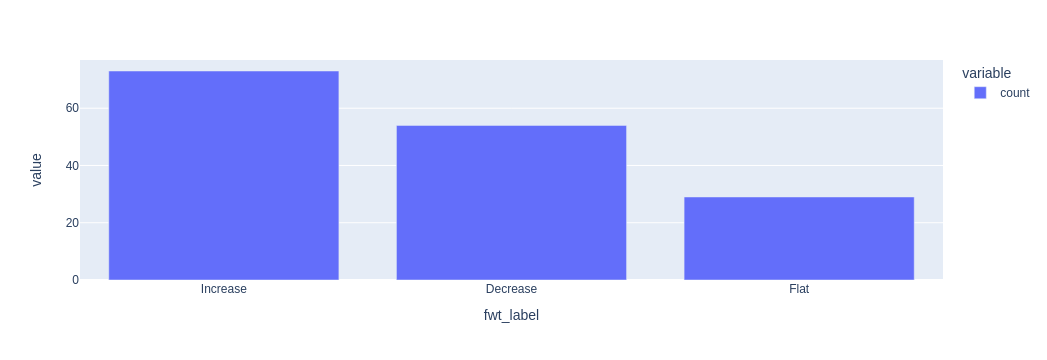

In [164]:
result1['fwt_label'].value_counts().plot(kind='bar')

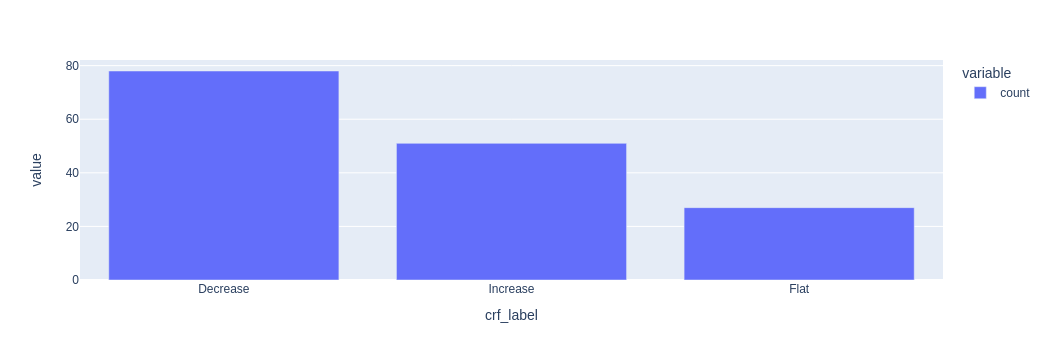

In [165]:
result1['crf_label'].value_counts().plot(kind='bar')

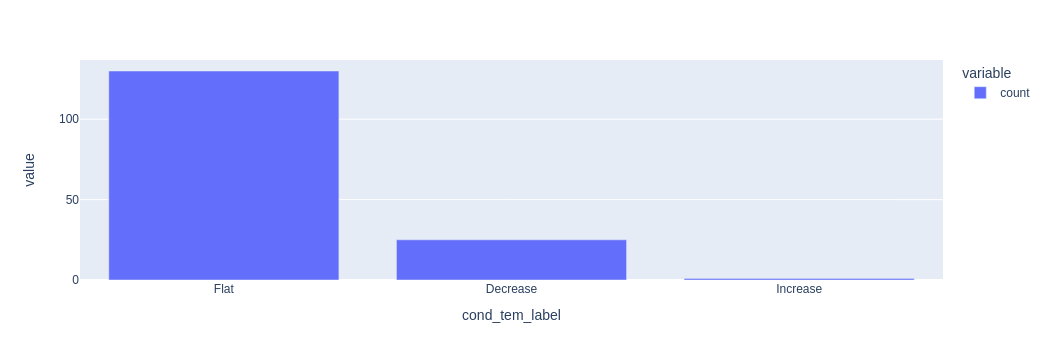

In [166]:
result1['cond_tem_label'].value_counts().plot(kind='bar')

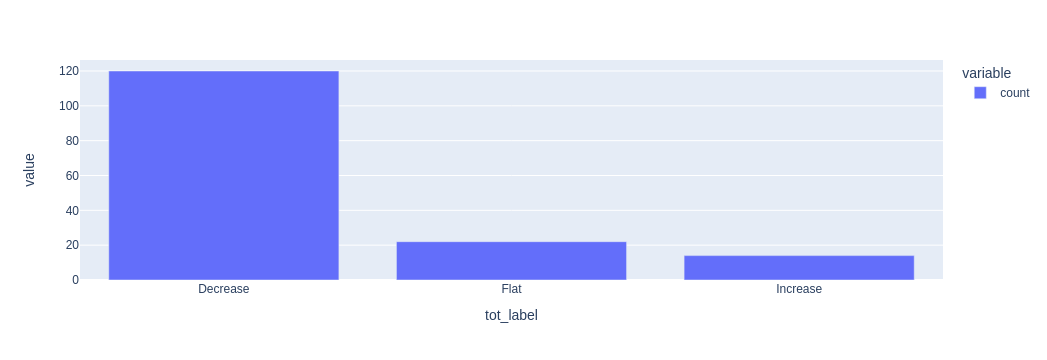

In [167]:
result1['tot_label'].value_counts().plot(kind='bar')

# Similarity Matrix

In [1]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

In [2]:
df_selected=result1[['tot_label','crf_label','fwt_label','cond_tem_label']]
label_mapping = {'Decrease': -1, 'Flat': 0, 'Increase': 1}
df_selected = result1[['tot_label', 'crf_label', 'fwt_label', 'cond_tem_label']]
df_selected.replace(label_mapping, inplace=True)


NameError: name 'result1' is not defined

In [ ]:
similarity_matrix = 1 - pairwise_distances(df_selected, metric='cosine')

In [ ]:
similarity_df = pd.DataFrame(similarity_matrix, index=df_selected.index, columns=df_selected.index)

In [ ]:
similarity_df